# Resume Classification
   The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir("C:\Data Science\DS Project\Resumes-20220812T140008Z-001 (1)\Resumes")

['Anil kumar.docx',
 'AradhanaTripathi[4_0].docx',
 'Buddha Vamsi.docx',
 'ChinnaSubbarayuduM_Hexaware.docx',
 'Gopi Krishna_Hexaware.docx',
 'Hari Krishna M_Hexaware.doc',
 'Harikrishna Akula_Hexaware.doc',
 'Hima Mendu_Hexaware.doc',
 'Himaja G_(Hexaware).docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'J. Sumanth Royal_Hexaware.doc',
 'Jyotiverma_Heaware.docx',
 'kamballapradeep.docx',
 'Madeeswar A_Hexaware.doc',
 'MooraboyinaGuravaiah_Hexaware.docx',
 'Naresh Babu Cherukuri_Hexaware.doc',
 'Nazeer Basha.doc',
 'Neeraj Mishra.docx',
 'P V Sai Krishna_ Hexaware.docx',
 'Peoplesoft Admin_AnubhavSingh.docx',
 'Peoplesoft Admin_G Ananda Rayudu.doc',
 'Peoplesoft Admin_Gangareddy.doc',
 'Peoplesoft Admin_Murali.docx',
 'Peoplesoft Admin_Priyanka Ramadoss.doc',
 'Peoplesoft Admin_SirazuddinMohammad.docx',
 'Peoplesoft Admin_srinivasarao.doc',
 'Peoplesoft Admin_Varkala Vikas.docx',
 'Peoplesoft Admin_Vinod Akkala.doc',
 '

In [3]:
import os
import textract

file_path1 = []
category1 = []
directory1 = r"C:\Data Science\DS Project\Resumes-20220812T140008Z-001 (1)\Resumes"

for i in os.listdir(directory1):
    if i.endswith('.docx'):
        file_path = os.path.join(directory1, i)
        file_content = textract.process(file_path).decode('utf-8')
        file_path1.append(file_content)
        category1.append('PeopleSoft')


In [4]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,PeopleSoft
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,PeopleSoft
2,BUDDHA VAMSI ...,PeopleSoft
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,PeopleSoft
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,PeopleSoft
5,G Himaja\n\n ...,PeopleSoft
6,Name: Ravali P \n\n\n\n ...,PeopleSoft
7,SUSOVAN BAG \n\nSeeking a challenging po...,PeopleSoft
8,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,PeopleSoft
9,KAMBALLA PRADEEP ...,PeopleSoft


In [5]:
file_path2 = []
category2  = []
directory2 = r"C:\Data Science\DS Project\Resumes-20220812T140008Z-001 (1)\Resumes"
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React_Developer')

In [6]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,React_Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,React_Developer
2,BUDDHA VAMSI ...,React_Developer
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,React_Developer
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,React_Developer
5,G Himaja\n\n ...,React_Developer
6,Name: Ravali P \n\n\n\n ...,React_Developer
7,SUSOVAN BAG \n\nSeeking a challenging po...,React_Developer
8,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,React_Developer
9,KAMBALLA PRADEEP ...,React_Developer


In [7]:
import os
import textract

file_path3 = []
category3 = []
directory3 = r"C:\Data Science\DS Project\Resumes-20220812T140008Z-001 (1)\Resumes"

for i in os.listdir(directory3):
    if i.endswith('.docx'):
        file_path = os.path.join(directory3, i)
        file_content = textract.process(file_path).decode('utf-8')
        file_path3.append(file_content)
        category3.append('SQL_Developer')


In [8]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL_Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL_Developer
2,BUDDHA VAMSI ...,SQL_Developer
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,SQL_Developer
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,SQL_Developer
5,G Himaja\n\n ...,SQL_Developer
6,Name: Ravali P \n\n\n\n ...,SQL_Developer
7,SUSOVAN BAG \n\nSeeking a challenging po...,SQL_Developer
8,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,SQL_Developer
9,KAMBALLA PRADEEP ...,SQL_Developer


In [9]:
file_path4 = []
category4  = []
directory4 = r"C:\Data Science\DS Project\Resumes-20220812T140008Z-001 (1)\Resumes"
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [10]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,Workday
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,Workday
2,BUDDHA VAMSI ...,Workday
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
5,G Himaja\n\n ...,Workday
6,Name: Ravali P \n\n\n\n ...,Workday
7,SUSOVAN BAG \n\nSeeking a challenging po...,Workday
8,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
9,KAMBALLA PRADEEP ...,Workday


# Creating Dataframe

In [11]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,PeopleSoft,NaN,NaN,NaN
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,PeopleSoft,NaN,NaN,NaN
2,BUDDHA VAMSI ...,PeopleSoft,NaN,NaN,NaN
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,PeopleSoft,NaN,NaN,NaN
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
203,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,NaN,NaN,NaN,Workday
204,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday
205,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
206,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday


In [12]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  208 non-null    object
 1   Category1    52 non-null     object
 2   Category2    52 non-null     object
 3   Category3    52 non-null     object
 4   Category4    52 non-null     object
dtypes: object(5)
memory usage: 8.2+ KB


In [13]:
#Merge all columns into one column

resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,BUDDHA VAMSI ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
203,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,NaN,NaN,NaN,Workday,Workday
204,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday
205,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
206,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday,Workday


In [14]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [15]:
#Final Dataset

resume_data.head(10)

,Category,Raw_Details
0,PeopleSoft,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
1,PeopleSoft,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
2,PeopleSoft,BUDDHA VAMSI ...
3,PeopleSoft,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
4,PeopleSoft,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
5,PeopleSoft,G Himaja\n\n ...
6,PeopleSoft,Name: Ravali P \n\n\n\n ...
7,PeopleSoft,SUSOVAN BAG \n\nSeeking a challenging po...
8,PeopleSoft,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
9,PeopleSoft,KAMBALLA PRADEEP ...


In [16]:
#Save CSV file

resume_data.to_csv('Raw_Resume.csv', index=False)

In [17]:
#Loading New dataset

resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
1,PeopleSoft,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
2,PeopleSoft,BUDDHA VAMSI ...
3,PeopleSoft,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
4,PeopleSoft,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
...,...,...
203,Workday,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
204,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
205,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
206,Workday,Vinay kumar .v\nWorkday Functional Consultant\...


In [18]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
156,Workday,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
157,Workday,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
158,Workday,BUDDHA VAMSI ...
159,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
160,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
161,Workday,G Himaja\n\n ...
162,Workday,Name: Ravali P \n\n\n\n ...
163,Workday,SUSOVAN BAG \n\nSeeking a challenging po...
164,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
165,Workday,KAMBALLA PRADEEP ...


In [19]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

# Number of Words in each Resume

In [20]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,645
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,664
2,BUDDHA VAMSI ...,394
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,955
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,676


# Number of Characters

In [21]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,4433
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,5161
2,BUDDHA VAMSI ...,3070
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,6542
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,4707


# Number of Stopwords

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,124
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,146
2,BUDDHA VAMSI ...,50
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,216
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,126


# Number of Numeric

In [23]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,3
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,6
2,BUDDHA VAMSI ...,10
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,6
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,1


In [24]:
resume_data.head(10)

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,645,4433,124,3
1,PeopleSoft,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,664,5161,146,6
2,PeopleSoft,BUDDHA VAMSI ...,394,3070,50,10
3,PeopleSoft,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,955,6542,216,6
4,PeopleSoft,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,676,4707,126,1
5,PeopleSoft,G Himaja\n\n ...,1317,5736,157,2
6,PeopleSoft,Name: Ravali P \n\n\n\n ...,1795,6175,179,12
7,PeopleSoft,SUSOVAN BAG \n\nSeeking a challenging po...,533,1901,39,0
8,PeopleSoft,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,485,4761,112,8
9,PeopleSoft,KAMBALLA PRADEEP ...,733,4837,160,5


# Text Pre-processing
# Using Regular Expression

In [25]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [26]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# Clean Text from Resume

In [27]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,anil kumar maddukuri sql msbi developer summar...
1,PeopleSoft,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,aradhana tripathi current location gachibowli ...
2,PeopleSoft,BUDDHA VAMSI ...,buddha vamsi career objective years experience...
3,PeopleSoft,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,chinna subbarayudu dob march nationality india...
4,PeopleSoft,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,name gopi krishna reddy professional summery w...
...,...,...,...
203,Workday,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
204,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
205,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
206,Workday,Vinay kumar .v\nWorkday Functional Consultant\...,vinay kumar workday functional consultant expe...


In [28]:
#Saving Cleaned File

resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anil kumar maddukuri sql msbi developer summar...
1,PeopleSoft,aradhana tripathi current location gachibowli ...
2,PeopleSoft,buddha vamsi career objective years experience...
3,PeopleSoft,chinna subbarayudu dob march nationality india...
4,PeopleSoft,name gopi krishna reddy professional summery w...
...,...,...
203,Workday,address manyata tech park nagavara bangalore l...
204,Workday,srikanth workday hcm consultant seeking suitab...
205,Workday,workday hcm fcm name kumar role workday consul...
206,Workday,vinay kumar workday functional consultant expe...


In [29]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [30]:
#Read Cleaned Dataset

resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anil kumar maddukuri sql msbi developer summar...
1,PeopleSoft,aradhana tripathi current location gachibowli ...
2,PeopleSoft,buddha vamsi career objective years experience...
3,PeopleSoft,chinna subbarayudu dob march nationality india...
4,PeopleSoft,name gopi krishna reddy professional summery w...
...,...,...
203,Workday,address manyata tech park nagavara bangalore l...
204,Workday,srikanth workday hcm consultant seeking suitab...
205,Workday,workday hcm fcm name kumar role workday consul...
206,Workday,vinay kumar workday functional consultant expe...


# Named Entity Recognition (NER)

In [31]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 1320), ('using', 1012), ('workday', 928), ('sql', 852), ('application', 832), ('server', 752), ('project', 732), ('data', 720), ('reports', 680), ('peoplesoft', 676), ('business', 660), ('web', 580), ('knowledge', 544), ('react', 528), ('process', 492), ('skills', 472), ('system', 464), ('good', 432), ('client', 420), ('tools', 408), ('working', 404), ('database', 396), ('involved', 396), ('creating', 388), ('various', 388), ('developer', 376), ('like', 376), ('support', 376), ('hcm', 376), ('worked', 372), ('integrations', 368), ('development', 364), ('technical', 356), ('integration', 348), ('servers', 344), ('services', 340), ('report', 332), ('people', 324), ('created', 320), ('html', 320), ('design', 312), ('used', 308), ('role', 296), ('team', 296), ('responsibilities', 288), ('studio', 284), ('eib', 284), ('work', 284), ('testing', 280), ('professional', 276)]


# Number of Profiles in Resume

# Data Exploration

In [32]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anil kumar maddukuri sql msbi developer summar...
1,PeopleSoft,aradhana tripathi current location gachibowli ...
2,PeopleSoft,buddha vamsi career objective years experience...
3,PeopleSoft,chinna subbarayudu dob march nationality india...
4,PeopleSoft,name gopi krishna reddy professional summery w...
...,...,...
203,Workday,address manyata tech park nagavara bangalore l...
204,Workday,srikanth workday hcm consultant seeking suitab...
205,Workday,workday hcm fcm name kumar role workday consul...
206,Workday,vinay kumar workday functional consultant expe...


# N-grams
N-grams analyses are often used to see which word often show up together.

In [33]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [34]:
from textblob import TextBlob

TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['aradhana']),
 WordList(['tripathi']),
 WordList(['current']),
 WordList(['location']),
 WordList(['gachibowli']),
 WordList(['hyderabad']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['accomplished']),
 WordList(['data']),
 WordList(['driven']),
 WordList(['analytical']),
 WordList(['professional']),
 WordList(['years']),
 WordList(['working']),
 WordList(['experience']),
 WordList(['information']),
 WordList(['technology']),
 WordList(['service']),
 WordList(['industry'])]

In [35]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['aradhana', 'tripathi']),
 WordList(['tripathi', 'current']),
 WordList(['current', 'location']),
 WordList(['location', 'gachibowli']),
 WordList(['gachibowli', 'hyderabad']),
 WordList(['hyderabad', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'accomplished']),
 WordList(['accomplished', 'data']),
 WordList(['data', 'driven']),
 WordList(['driven', 'analytical']),
 WordList(['analytical', 'professional']),
 WordList(['professional', 'years']),
 WordList(['years', 'working']),
 WordList(['working', 'experience']),
 WordList(['experience', 'information']),
 WordList(['information', 'technology']),
 WordList(['technology', 'service']),
 WordList(['service', 'industry']),
 WordList(['industry', 'currently'])]

In [71]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['aradhana', 'tripathi', 'current']),
 WordList(['tripathi', 'current', 'location']),
 WordList(['current', 'location', 'gachibowli']),
 WordList(['location', 'gachibowli', 'hyderabad']),
 WordList(['gachibowli', 'hyderabad', 'profile']),
 WordList(['hyderabad', 'profile', 'summary']),
 WordList(['profile', 'summary', 'accomplished']),
 WordList(['summary', 'accomplished', 'data']),
 WordList(['accomplished', 'data', 'driven']),
 WordList(['data', 'driven', 'analytical']),
 WordList(['driven', 'analytical', 'professional']),
 WordList(['analytical', 'professional', 'years']),
 WordList(['professional', 'years', 'working']),
 WordList(['years', 'working', 'experience']),
 WordList(['working', 'experience', 'information']),
 WordList(['experience', 'information', 'technology']),
 WordList(['information', 'technology', 'service']),
 WordList(['technology', 'service', 'industry']),
 WordList(['service', 'industry', 'currently']),
 WordList(['industry', 'currently', 'working'])]

In [37]:
resume_data['Resume_Details']

0      anil kumar maddukuri sql msbi developer summar...
1      aradhana tripathi current location gachibowli ...
2      buddha vamsi career objective years experience...
3      chinna subbarayudu dob march nationality india...
4      name gopi krishna reddy professional summery w...
                             ...                        
203    address manyata tech park nagavara bangalore l...
204    srikanth workday hcm consultant seeking suitab...
205    workday hcm fcm name kumar role workday consul...
206    vinay kumar workday functional consultant expe...
207    sql msbi developer sql msbi developer vinod ku...
Name: Resume_Details, Length: 208, dtype: object

# Top 20 most used words in Resumes

In [38]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [39]:
df_ngram

,Frequency,Unigram_Bigram
0,1320,experience
1,1012,using
2,928,workday
3,852,sql
4,832,application
...,...,...
16265,4,ability create
16266,4,ability convey
16267,4,ability build
16268,4,abilities communication


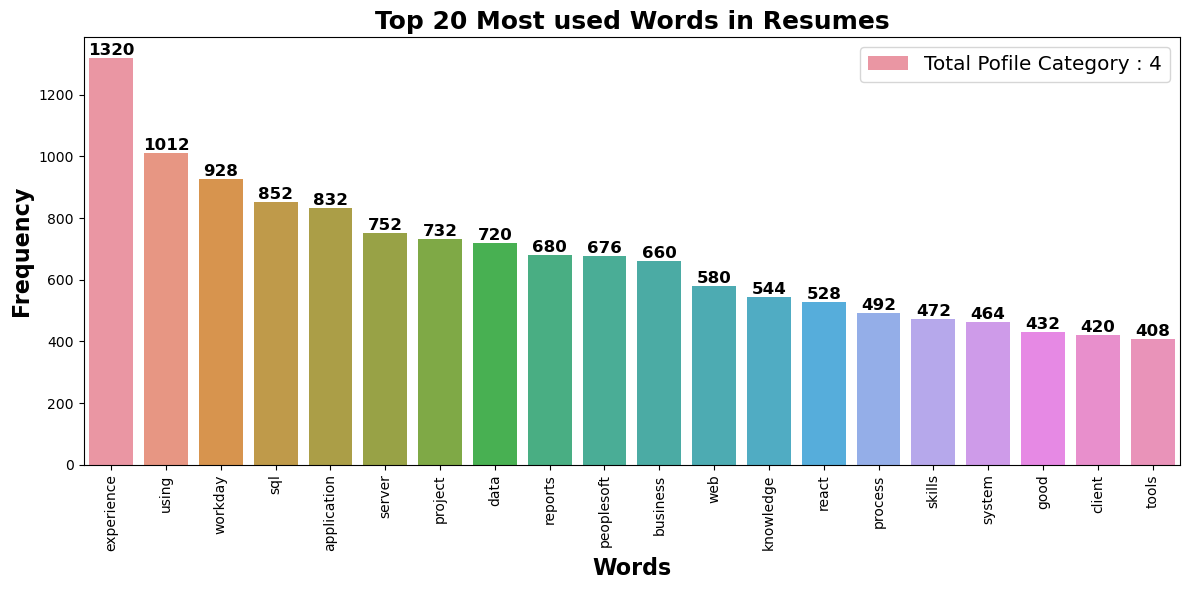

In [40]:
fig, axe = plt.subplots(1,1, figsize=(12,6))
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

fig.tight_layout()
plt.show()

# Using Word Cloud¶

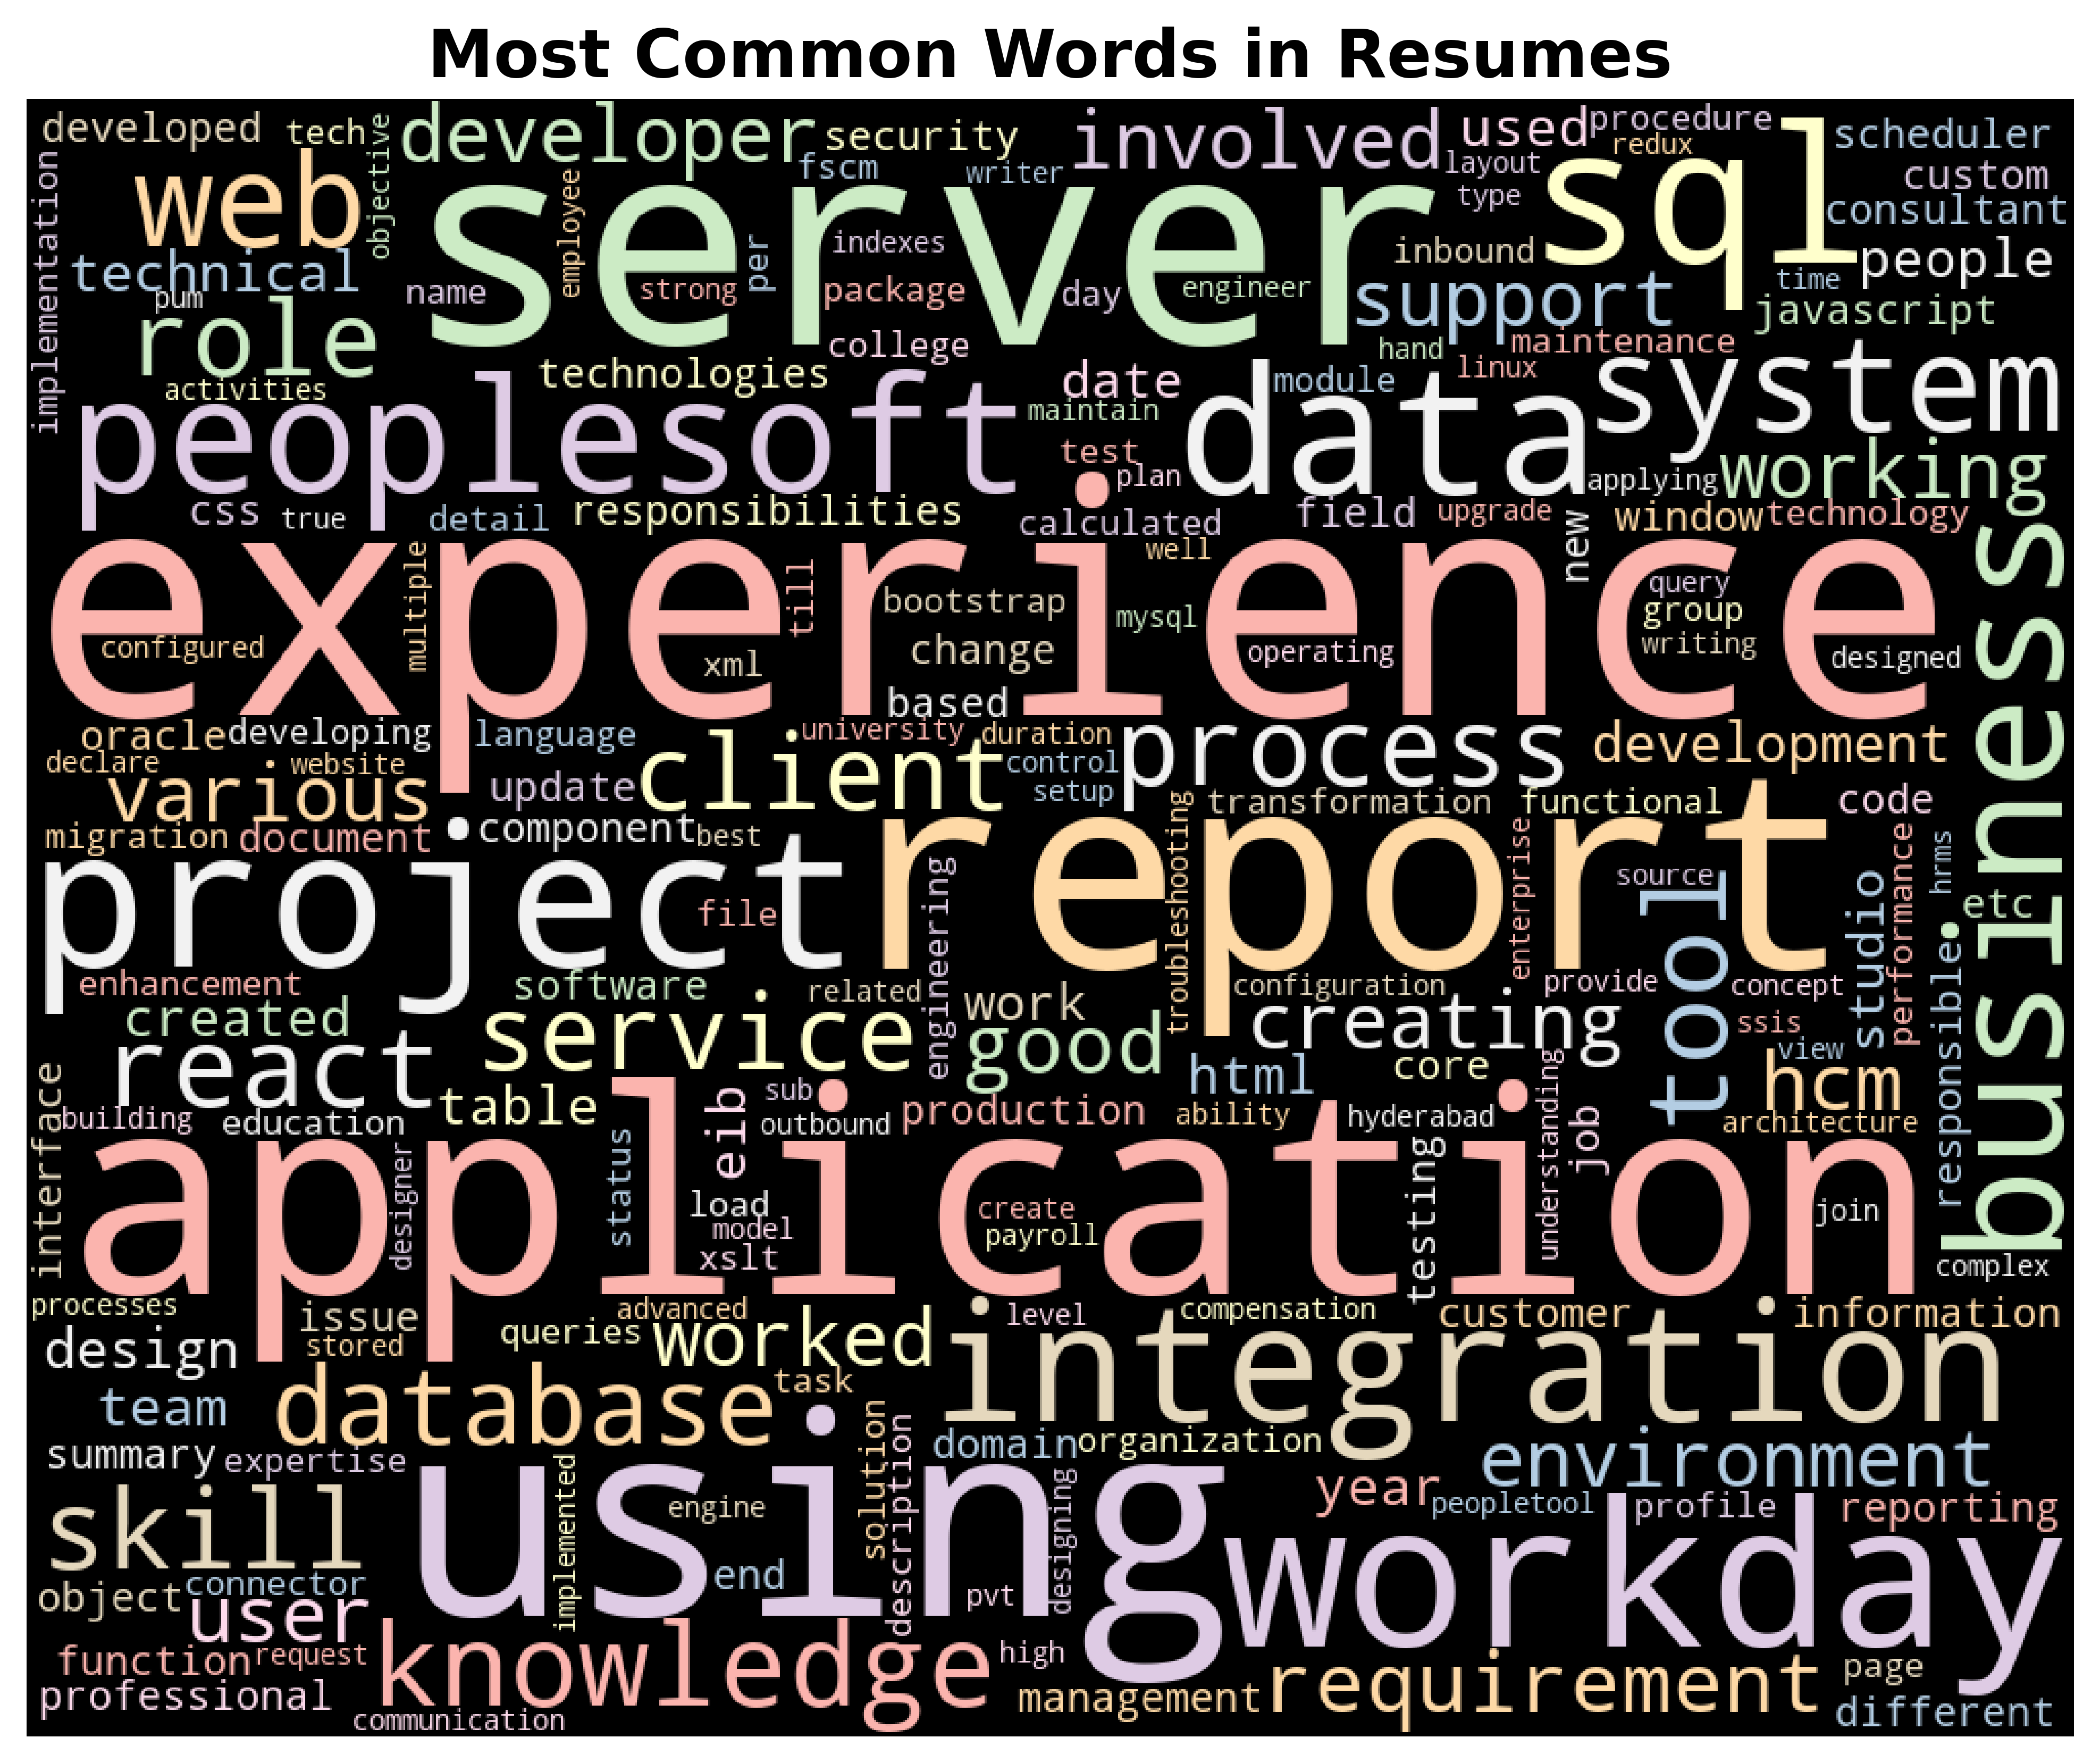

In [41]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# Model Building

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

In [43]:
!pip install xgboost
from xgboost import XGBClassifier

In [44]:
resume_data.head(10)

,Category,Resume_Details
0,PeopleSoft,anil kumar maddukuri sql msbi developer summar...
1,PeopleSoft,aradhana tripathi current location gachibowli ...
2,PeopleSoft,buddha vamsi career objective years experience...
3,PeopleSoft,chinna subbarayudu dob march nationality india...
4,PeopleSoft,name gopi krishna reddy professional summery w...
5,PeopleSoft,himaja career objective work towards achieving...
6,PeopleSoft,name ravali curriculum vitae specialization co...
7,PeopleSoft,susovan bag seeking challenging position field...
8,PeopleSoft,jyoti verma professional summary professional ...
9,PeopleSoft,kamballa pradeep synopsis looking forward aspi...


# Train-Test Split

In [45]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=143, test_size=0.25)
x_train.shape, x_test.shape

((156,), (52,))

## Vectorization¶

In [47]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [48]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [49]:
import sklearn
print(sklearn.__version__)



1.3.0


In [50]:
print(set(type(text) for text in x_train))
print(set(type(text) for text in x_test))


{<class 'str'>}
{<class 'str'>}


In [51]:
x_train = [str(text) for text in x_train]
x_test = [str(text) for text in x_test]


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming x_train and x_test are lists of strings (text data)
# Make sure they are in the correct format, for example:
# x_train = ["This is a sample text", "Another sample text", ...]
# x_test = ["Test text", "More test text", ...]

# Instantiate the TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Fit and transform the training data
x_train_tfidf = tfidf_vector.fit_transform(x_train)

# Transform the test data (using the same vectorizer)
x_test_tfidf = tfidf_vector.transform(x_test)



In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming x_train and x_test are lists of strings (text data)
# Make sure they are in the correct format, for example:
# x_train = ["This is a sample text", "Another sample text", ...]
# x_test = ["Test text", "More test text", ...]

# Instantiate the TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Fit and transform the training data
x_train_tfidf = tfidf_vector.fit_transform(x_train)

# Transform the test data (using the same vectorizer)
x_test_tfidf = tfidf_vector.transform(x_test)

# Get the shape of x_train_tfidf and x_test_tfidf
print("Shape of x_train_tfidf:", x_train_tfidf.shape)
print("Shape of x_test_tfidf:", x_test_tfidf.shape)


Shape of x_train_tfidf: (156, 3226)
Shape of x_test_tfidf: (52, 3226)


In [54]:
print(y_train),print(y_test)

['PeopleSoft' 'SQL_Developer' 'SQL_Developer' 'React_Developer'
 'React_Developer' 'React_Developer' 'React_Developer' 'PeopleSoft'
 'React_Developer' 'React_Developer' 'Workday' 'Workday' 'PeopleSoft'
 'Workday' 'Workday' 'PeopleSoft' 'SQL_Developer' 'PeopleSoft'
 'PeopleSoft' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'React_Developer' 'SQL_Developer' 'PeopleSoft' 'Workday' 'Workday'
 'React_Developer' 'React_Developer' 'PeopleSoft' 'Workday'
 'React_Developer' 'SQL_Developer' 'PeopleSoft' 'React_Developer'
 'Workday' 'Workday' 'SQL_Developer' 'PeopleSoft' 'Workday'
 'React_Developer' 'SQL_Developer' 'React_Developer' 'PeopleSoft'
 'Workday' 'PeopleSoft' 'Workday' 'SQL_Developer' 'Workday'
 'SQL_Developer' 'React_Developer' 'Workday' 'Workday' 'PeopleSoft'
 'React_Developer' 'PeopleSoft' 'React_Developer' 'PeopleSoft'
 'PeopleSoft' 'React_Developer' 'Workday' 'PeopleSoft' 'React_Developer'
 'PeopleSoft' 'PeopleSoft' 'PeopleSoft' 'Workday' 'Workday'
 'React_Developer' 'React

(None, None)

# Classification Models

# KNN Classifier

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'df' with 'text' as the column containing the text data and 'target' as the target column
X = df['text']
y = df['target']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data to numerical vectors
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create the KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=37)

# Train the classifier on the training data
model_knn.fit(x_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model_knn.predict(x_test_tfidf)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set: {:.2f}'.format(model_knn.score(x_train_tfidf, y_train)))
print('Accuracy of test set: {:.2f}'.format(accuracy_knn))

# Print classification report
print("Classification report for classifier:\n%s\n" % classification_report(y_test, y_pred))


NameError: name 'df' is not defined

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined the DataFrame 'df' with 'text' as the column containing the text data and 'target' as the target column
X = df['text'].apply(' '.join)  # Join elements in the list to create a single string per row
y = df['target']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data to numerical vectors
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create the KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=37)

# Train the classifier on the training data
model_knn.fit(x_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model_knn.predict(x_test_tfidf)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set: {:.2f}'.format(model_knn.score(x_train_tfidf, y_train)))
print('Accuracy of test set: {:.2f}'.format(accuracy_knn))

# Print classification report
print("Classification report for classifier:\n%s\n" % classification_report(y_test, y_pred))



NameError: name 'df' is not defined

# Decision Tree Classifier

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Assuming you have categorical data in x_combined, use one-hot encoding
encoder = OneHotEncoder()
x_combined_encoded = encoder.fit_transform(x_combined).toarray()

# Split x_combined_encoded into x_train and x_test
x_train, x_test, y_train, y_test = train_test_split(x_combined_encoded, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model_KNN = KNeighborsClassifier()  # Use KNeighborsClassifier for KNN
model_KNN.fit(x_train, y_train)
y_pred = model_KNN.predict(x_test)

print('Accuracy of training set: {:.2f}'.format(model_KNN.score(x_train, y_train)))
print('Accuracy of test set: {:.2f}'.format(model_KNN.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_KNN, classification_report(y_test, y_pred)))

precision_KNN = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_KNN = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_KNN = round(f1_score(y_test, y_pred, average='macro'), 2)
accuracy_KNN = round(accuracy_score(y_test, y_pred), 2)

print('Precision: {:.2f}'.format(precision_KNN))
print('Recall: {:.2f}'.format(recall_KNN))
print('F1 Score: {:.2f}'.format(f1_KNN))

# Using cross-validation for more robust evaluation
results = cross_val_score(model_KNN, x_train, y_train, cv=kfold)
print('Cross-validation Accuracy: {:.2f} (+/- {:.2f})'.format(results.mean(), results.std() * 2))







NameError: name 'x_combined' is not defined

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Assuming you have your features and target variables
# features = x_combined_encoded (after one-hot encoding or other preprocessing)
# target = y_combined (assuming it's numerical)

# Step 1: Remove career objective (text feature) if it's not relevant
# features = np.delete(features, text_feature_index, axis=1)

# Step 2: If you have categorical features, encode them using one-hot or label encoding
# encoder = OneHotEncoder()
# features_encoded = encoder.fit_transform(features).toarray()

# or
# label_encoder = LabelEncoder()
# categorical_feature_index = 2  # Replace with the index of your categorical feature
# features[:, categorical_feature_index] = label_encoder.fit_transform(features[:, categorical_feature_index])

# Step 3: Split the data into training and test sets

# Step 4: Create and train the KNeighborsClassifier
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)


kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)





from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Assuming you have already defined x_train, y_train, x_test, y_test

print('Accuracy of training set: {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of test set: {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT, classification_report(y_test, y_pred)))

precision_DT = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_DT = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_DT = round(f1_score(y_test, y_pred, average='macro'), 2)
accuracy_DT = round(accuracy_score(y_test, y_pred), 2)

print('Precision: {:.2f}'.format(precision_DT))
print('Recall: {:.2f}'.format(recall_DT))
print('F1 Score: {:.2f}'.format(f1_DT))

# Using cross-validation for more robust evaluation
results = cross_val_score(model_DT, x_train, y_train, cv=kfold)
print('Cross-validation Accuracy: {:.2f} (+/- {:.2f})'.format(results.mean(), results.std() * 2))



ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

# Random Forest Classifier

In [96]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_RF, x_train, y_train, cv = kfold)

precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

ValueError: Found input variables with inconsistent numbers of samples: [8300, 166]

# Support Vector Machine (SVM) Classifier

In [64]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_svm, x_train, y_train, cv = kfold)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

ValueError: could not convert string to float: 'sql developer name bandi prem sai career objective willing work challenging professional environment exposure new technologies sql area sql server enterprise portal ample scope organizational growth well individual growth professional experience years experience microsoft sql server environment thorough knowledge sql server databases expertise scripting sql queries stored procedures user defined functions triggers hands experience performing error handling performance tuning stored procedure good experienced creating using temporary table table variable cte common table expressions used sub queries derived table joins simplify complex queries involving multiple tables expertise creating maintaining database objects like indexes functions views udf constraints good experience using ranking functions date functions string functions aggregate functions good knowledge transactions isolation level concurrency problems good experience building relationship using constraints good knowledge creating jobs automate process using sql server agent good knowledge new features sql server technical skills relational databases sql server tools packages ssms languages sql sql operating system windows application packages outlook microsoft office suite education sri venkateswara university tirupathi professional experience worked techasoft pvt ltd software engineer bangalore since oct till date project details project project name haematology solutions client name bravo pharma domain health care duration feb till date role sql developer description bravo pharma cares protection enhancement human health well levels spectrum activities ranges supporting education life sciences strengthening start ups health technologies offering novel solutions diagnostics personalized treatment production sales pharmaceuticals responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key project project name integrated simple commerce solution client name codi domain commerce duration nov feb role sql developer description integrated simple commerce solution ecommerce application sell products laptop printers etc online integrated simple commerce solution built high end technology integrated many upstream downstream systems handle business full fill customer needs integrated simple commerce solution millions customers around countries provides easy way find buy products responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key'

# Logostic Regression

In [65]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_lgr, x_train, y_train, cv = kfold)

precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

ValueError: could not convert string to float: 'sql developer name bandi prem sai career objective willing work challenging professional environment exposure new technologies sql area sql server enterprise portal ample scope organizational growth well individual growth professional experience years experience microsoft sql server environment thorough knowledge sql server databases expertise scripting sql queries stored procedures user defined functions triggers hands experience performing error handling performance tuning stored procedure good experienced creating using temporary table table variable cte common table expressions used sub queries derived table joins simplify complex queries involving multiple tables expertise creating maintaining database objects like indexes functions views udf constraints good experience using ranking functions date functions string functions aggregate functions good knowledge transactions isolation level concurrency problems good experience building relationship using constraints good knowledge creating jobs automate process using sql server agent good knowledge new features sql server technical skills relational databases sql server tools packages ssms languages sql sql operating system windows application packages outlook microsoft office suite education sri venkateswara university tirupathi professional experience worked techasoft pvt ltd software engineer bangalore since oct till date project details project project name haematology solutions client name bravo pharma domain health care duration feb till date role sql developer description bravo pharma cares protection enhancement human health well levels spectrum activities ranges supporting education life sciences strengthening start ups health technologies offering novel solutions diagnostics personalized treatment production sales pharmaceuticals responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key project project name integrated simple commerce solution client name codi domain commerce duration nov feb role sql developer description integrated simple commerce solution ecommerce application sell products laptop printers etc online integrated simple commerce solution built high end technology integrated many upstream downstream systems handle business full fill customer needs integrated simple commerce solution millions customers around countries provides easy way find buy products responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key'

# Bagging Classifier

In [66]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_bagg, x_train, y_train, cv = kfold)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

# Gradient Boosting Classifier

In [67]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_GradientBoost, x_train, y_train, cv = kfold)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

ValueError: could not convert string to float: 'sql developer name bandi prem sai career objective willing work challenging professional environment exposure new technologies sql area sql server enterprise portal ample scope organizational growth well individual growth professional experience years experience microsoft sql server environment thorough knowledge sql server databases expertise scripting sql queries stored procedures user defined functions triggers hands experience performing error handling performance tuning stored procedure good experienced creating using temporary table table variable cte common table expressions used sub queries derived table joins simplify complex queries involving multiple tables expertise creating maintaining database objects like indexes functions views udf constraints good experience using ranking functions date functions string functions aggregate functions good knowledge transactions isolation level concurrency problems good experience building relationship using constraints good knowledge creating jobs automate process using sql server agent good knowledge new features sql server technical skills relational databases sql server tools packages ssms languages sql sql operating system windows application packages outlook microsoft office suite education sri venkateswara university tirupathi professional experience worked techasoft pvt ltd software engineer bangalore since oct till date project details project project name haematology solutions client name bravo pharma domain health care duration feb till date role sql developer description bravo pharma cares protection enhancement human health well levels spectrum activities ranges supporting education life sciences strengthening start ups health technologies offering novel solutions diagnostics personalized treatment production sales pharmaceuticals responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key project project name integrated simple commerce solution client name codi domain commerce duration nov feb role sql developer description integrated simple commerce solution ecommerce application sell products laptop printers etc online integrated simple commerce solution built high end technology integrated many upstream downstream systems handle business full fill customer needs integrated simple commerce solution millions customers around countries provides easy way find buy products responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key'

# Naive Bayes Classifier

In [68]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_NB, x_train, y_train, cv = kfold)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

# Model Evaluation

In [69]:


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Create an instance of AdaBoostClassifier
model_Adaboost = AdaBoostClassifier()

# Train the model on the training data
model_Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_Adaboost.predict(x_test)







ValueError: could not convert string to float: 'sql developer name bandi prem sai career objective willing work challenging professional environment exposure new technologies sql area sql server enterprise portal ample scope organizational growth well individual growth professional experience years experience microsoft sql server environment thorough knowledge sql server databases expertise scripting sql queries stored procedures user defined functions triggers hands experience performing error handling performance tuning stored procedure good experienced creating using temporary table table variable cte common table expressions used sub queries derived table joins simplify complex queries involving multiple tables expertise creating maintaining database objects like indexes functions views udf constraints good experience using ranking functions date functions string functions aggregate functions good knowledge transactions isolation level concurrency problems good experience building relationship using constraints good knowledge creating jobs automate process using sql server agent good knowledge new features sql server technical skills relational databases sql server tools packages ssms languages sql sql operating system windows application packages outlook microsoft office suite education sri venkateswara university tirupathi professional experience worked techasoft pvt ltd software engineer bangalore since oct till date project details project project name haematology solutions client name bravo pharma domain health care duration feb till date role sql developer description bravo pharma cares protection enhancement human health well levels spectrum activities ranges supporting education life sciences strengthening start ups health technologies offering novel solutions diagnostics personalized treatment production sales pharmaceuticals responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key project project name integrated simple commerce solution client name codi domain commerce duration nov feb role sql developer description integrated simple commerce solution ecommerce application sell products laptop printers etc online integrated simple commerce solution built high end technology integrated many upstream downstream systems handle business full fill customer needs integrated simple commerce solution millions customers around countries provides easy way find buy products responsibilities developed optimized database structures stored procedures views user defined functions application created sql queries stored procedures design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes design create sql tables indexes responsible query optimization performance tuning performing query plans making sure every query using appropriate useful indexes created constraints mainly primary key foreign key'

In [70]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Calculate the precision for the AdaBoost classifier
precision_Adaboost = precision_score(y_test, model_Adaboost.predict(x_test), average='macro')

# Make predictions on the test set
y_pred_Adaboost = model_Adaboost.predict(x_test)

# Calculate the test accuracy for the AdaBoost classifier
accuracy_Adaboost = accuracy_score(y_test, y_pred_Adaboost)

# Calculate the recall for the AdaBoost classifier
recall_Adaboost = recall_score(y_test, y_pred_Adaboost, average='macro')

# Calculate the F1 score for the AdaBoost classifier
f1_Adaboost = f1_score(y_test, y_pred_Adaboost, average='macro')

# Evaluation dictionary
Evaluation = {
    "Models": ["KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", "SVM Classifier",
               "Logistic Regression", "Bagging Classifier", "AdaBoost Classifier", "Gradient Boosting Classifier",
               "Naive Bayes Classifier"],
    "Train Accuracy(%)": [model_knn.score(x_train, y_train), model_DT.score(x_train, y_train),
                           model_RF.score(x_train, y_train), model_svm.score(x_train, y_train),
                           model_lgr.score(x_train, y_train), model_bagg.score(x_train, y_train),
                           model_Adaboost.score(x_train, y_train), model_GradientBoost.score(x_train, y_train),
                           model_NB.score(x_train, y_train)],
    "Test Accuracy(%)": [accuracy_knn, accuracy_DT, accuracy_RF, accuracy_svm, accuracy_lgr, accuracy_bagg,
                          accuracy_Adaboost, accuracy_GradientBoost, accuracy_NB],
    "Precision(%)": [precision_knn, precision_DT, precision_RF, precision_svm, precision_lgr, precision_bagg,
                      precision_Adaboost, precision_Gradientboost, precision_NB],
    "Recall(%)": [recall_knn, recall_DT, recall_RF, recall_svm, recall_lgr, recall_bagg, recall_Adaboost,
                  recall_Gradientboost, recall_NB],
    "F1-Score(%)": [f1_knn, f1_DT, f1_RF, f1_svm, f1_lgr, f1_bagg, f1_Adaboost, f1_Gradientboost, f1_NB]
}

# Create a DataFrame from the Evaluation dictionary
table = pd.DataFrame(Evaluation)
print(table)





AttributeError: 'AdaBoostClassifier' object has no attribute 'n_classes_'

In [71]:

Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [72]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

NameError: name 'accuracy_DT' is not defined

# Train And Test Accuracy Plot

NameError: name 'table' is not defined

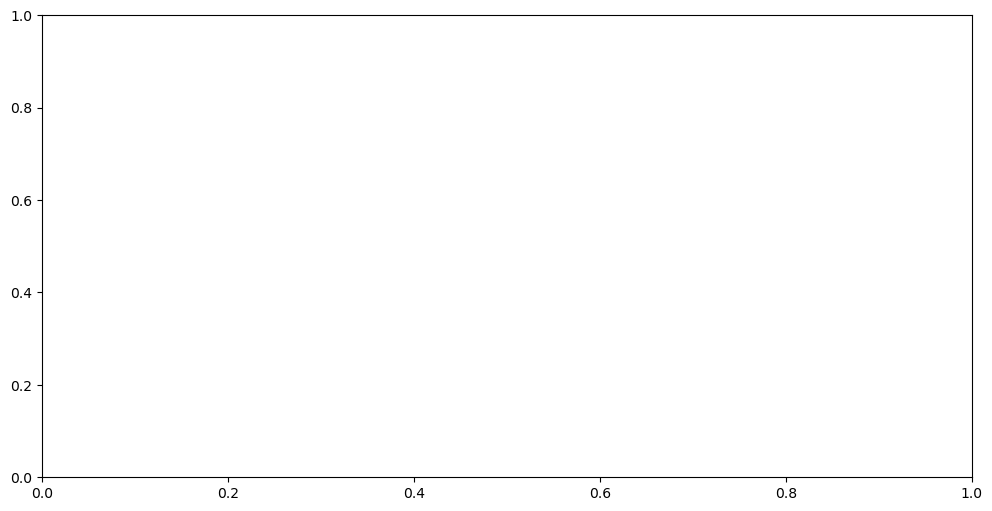

In [73]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6))
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

fig.tight_layout()
plt.show()

In [74]:
import pickle


In [75]:


# Save an object to a file using pickle
data = [1, 2, 3, 4, 5]
with open('nlp_model.pkl', 'wb') as file:
    pickle.dump(model_NB.fit, file)

# Load the object from the file
with open('nlp_model.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(loaded_data)  # Output: [1, 2, 3, 4, 5]



<bound method _BaseDiscreteNB.fit of MultinomialNB(alpha=1, fit_prior=False)>


In [76]:
# Save an object to a file using pickle
data = [1, 2, 3, 4, 5]
with open('cv.pkl', 'wb') as file:
    pickle.dump(tfidf_vector, file)

# Load the object from the file
with open('cv.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(loaded_data)  # Output: [1, 2, 3, 4, 5]


TfidfVectorizer()
